## Project Title: HR Analysis and Visualization

Name:- Hrithik Deep
 
 
 Objective:

Analyze HR data to understand key factors behind employee attrition, satisfaction, and performance. Visualize insights and build predictive models.

### Step 1: Import Libraries & Load Dataset

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean column names
df = pd.read_csv("HRDataset_v14.csv")
df.columns = df.columns.str.strip()


## Step 2: Data Overview
View the first few rows with df.head()

Check data types, nulls, and shape

In [19]:
df.shape
df.info()
df.describe(include='all')
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


### Step 3: Data Cleaning
Check and remove duplicate rows

Handle missing values (if any)

Strip whitespaces from column names

In [21]:
# Remove duplicates
df = df.drop_duplicates()

# Check and display null values
print(df.isnull().sum())


Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

### Step 4: Exploratory Data Analysis (EDA)

**Attrition by Department**

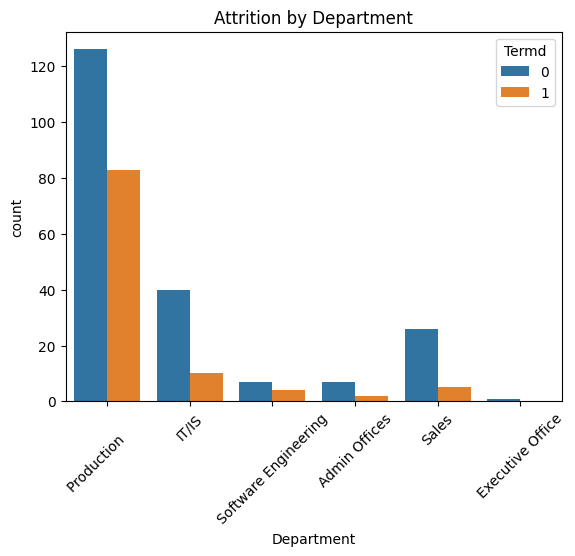

In [23]:
sns.countplot(x='Department', hue='Termd', data=df)
plt.xticks(rotation=45)
plt.title("Attrition by Department")
plt.show()


**Engagement Survey Distribution**

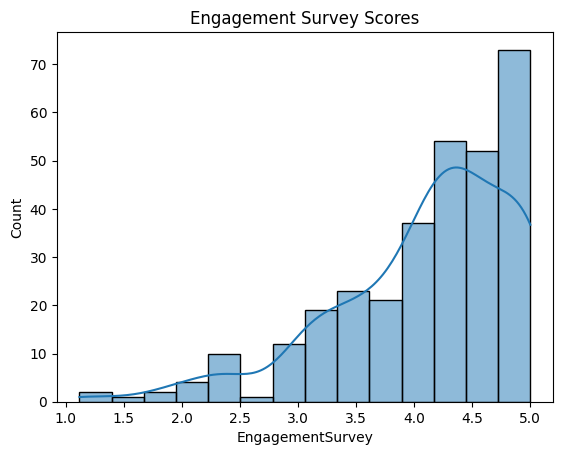

In [25]:
sns.histplot(df['EngagementSurvey'].dropna(), kde=True)
plt.title("Engagement Survey Scores")
plt.show()


**Absences vs Performance Score**

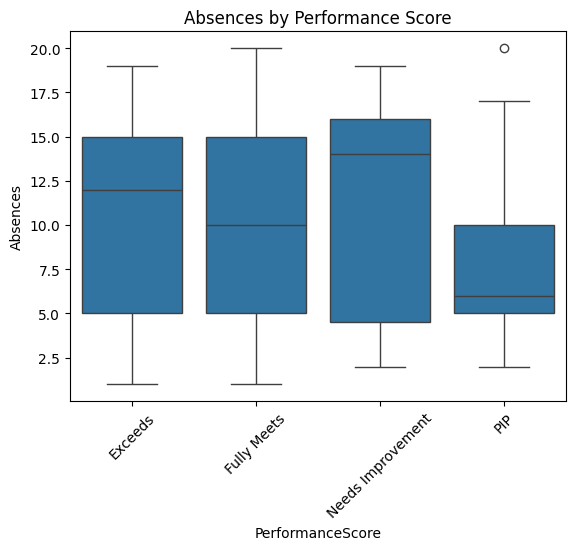

In [27]:
sns.boxplot(x='PerformanceScore', y='Absences', data=df)
plt.xticks(rotation=45)
plt.title("Absences by Performance Score")
plt.show()


**Satisfaction vs Termd (Attrition)**

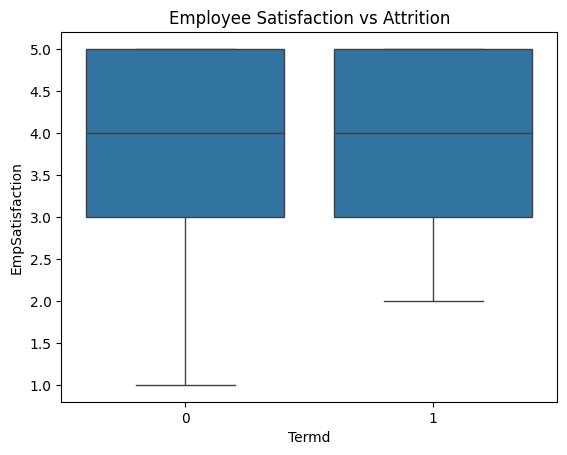

In [36]:
sns.boxplot(x='Termd', y='EmpSatisfaction', data=df)
plt.title("Employee Satisfaction vs Attrition")
plt.show()


## Step 5: Correlation Analysis

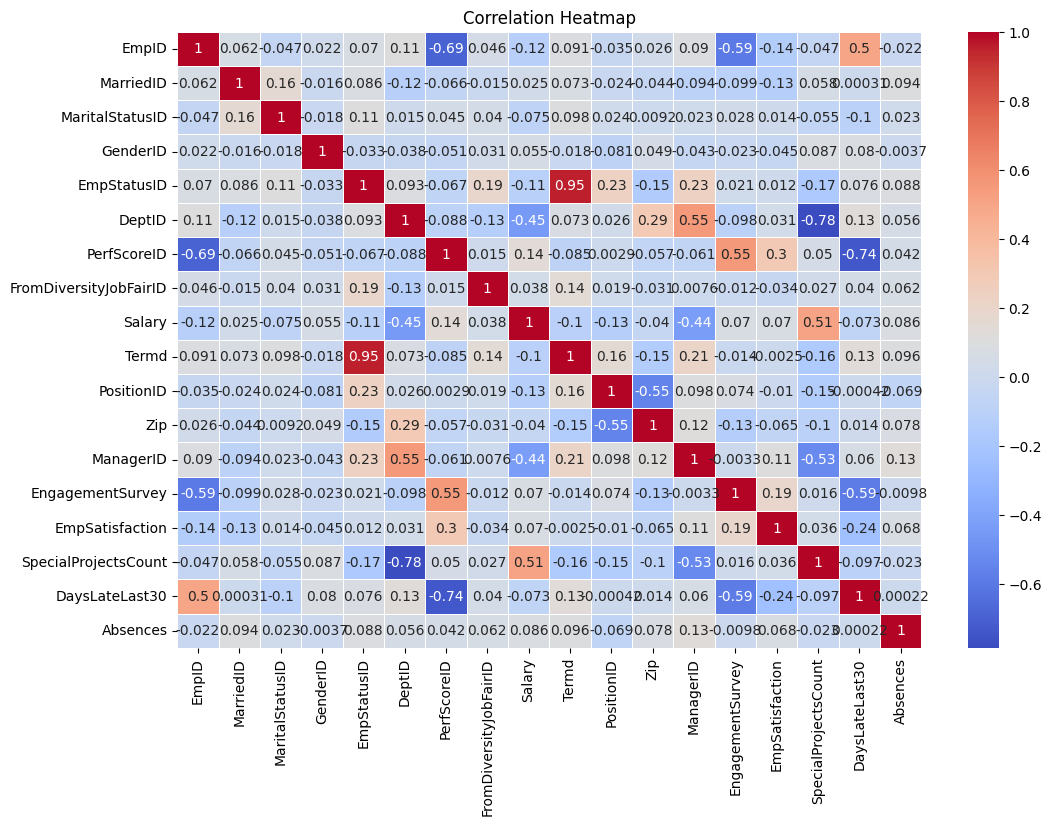

In [29]:
numeric_df = df.select_dtypes(include=['int64', 'float64']).dropna()

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


## summary :-

Lower satisfaction and engagement correlate with attrition (Termd)

Employees with more absences tend to have lower performance

Some departments have higher attrition than others